In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import boxcox, jarque_bera, normaltest
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import scale, normalize, StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [2]:
LoL_df = pd.read_csv('data/LoL_ranked.csv')

In [3]:
LoL_df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [4]:
# Calculate percentage of nulls in each column
(LoL_df.isnull().sum() * 100)/ len(LoL_df)

gameId                          0.0
blueWins                        0.0
blueWardsPlaced                 0.0
blueWardsDestroyed              0.0
blueFirstBlood                  0.0
blueKills                       0.0
blueDeaths                      0.0
blueAssists                     0.0
blueEliteMonsters               0.0
blueDragons                     0.0
blueHeralds                     0.0
blueTowersDestroyed             0.0
blueTotalGold                   0.0
blueAvgLevel                    0.0
blueTotalExperience             0.0
blueTotalMinionsKilled          0.0
blueTotalJungleMinionsKilled    0.0
blueGoldDiff                    0.0
blueExperienceDiff              0.0
blueCSPerMin                    0.0
blueGoldPerMin                  0.0
redWardsPlaced                  0.0
redWardsDestroyed               0.0
redFirstBlood                   0.0
redKills                        0.0
redDeaths                       0.0
redAssists                      0.0
redEliteMonsters            

In [5]:
LoL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [6]:
LoL_df.drop('gameId', axis=1, inplace=True)

In [7]:
LoL_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [8]:
LoL_df['redWardsPlaced'].mean()

22.367952221884806

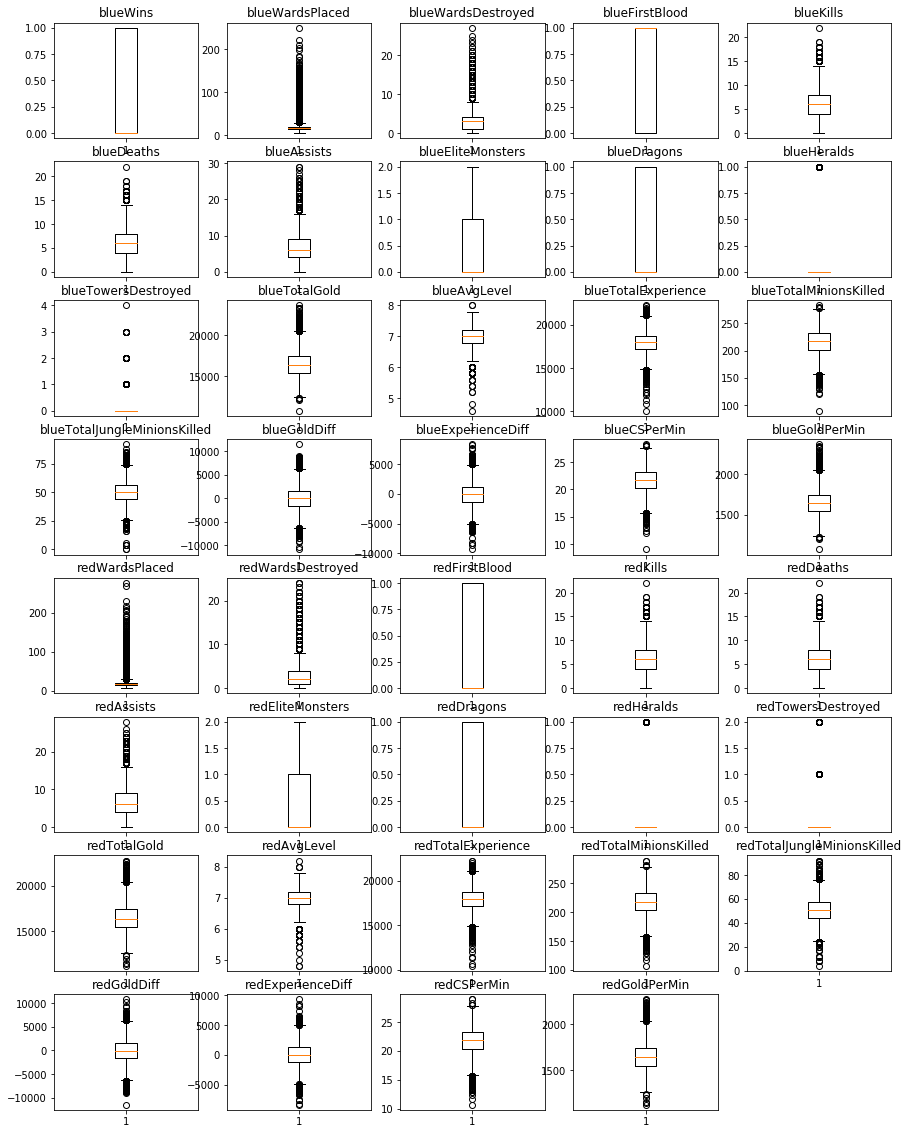

In [9]:
fig = plt.subplots(figsize=(15,20))
for x in range(len(LoL_df.columns)):
    plt.subplot(8, 5, x+1)
    plt.boxplot(LoL_df.iloc[:, x])
    plt.title('{}'.format(LoL_df.columns[x]))

In [10]:

'''# Interquartile Range method for determining outliers

threshold = 1.5

for col in LoL_df.columns:
    q90, q10 = np.percentile(LoL_df[col], [90, 10])
    iqr = q90 - q10
    min_val = q10 - (iqr * threshold)
    max_val = q90 + (iqr * threshold)
    outliers = len(np.where((LoL_df[col] > max_val) | (LoL_df[col] < min_val)))
    print('outliers in {}: {}'.format(col, outliers))
    
    # Winsorize the outliers so data has a more meaningful range
    if outliers > 0:
        winsorized = winsorize(LoL_df[col], (0.1, 0.1))
        LoL_df[col] = winsorized
        outliers2 = len(np.where((LoL_df[col] > max_val) | (LoL_df[col] < min_val)))
        print('outliers after winsorize: ', outliers2)
    print('\n')'''

"# Interquartile Range method for determining outliers\n\nthreshold = 1.5\n\nfor col in LoL_df.columns:\n    q90, q10 = np.percentile(LoL_df[col], [90, 10])\n    iqr = q90 - q10\n    min_val = q10 - (iqr * threshold)\n    max_val = q90 + (iqr * threshold)\n    outliers = len(np.where((LoL_df[col] > max_val) | (LoL_df[col] < min_val)))\n    print('outliers in {}: {}'.format(col, outliers))\n    \n    # Winsorize the outliers so data has a more meaningful range\n    if outliers > 0:\n        winsorized = winsorize(LoL_df[col], (0.1, 0.1))\n        LoL_df[col] = winsorized\n        outliers2 = len(np.where((LoL_df[col] > max_val) | (LoL_df[col] < min_val)))\n        print('outliers after winsorize: ', outliers2)\n    print('\n')"

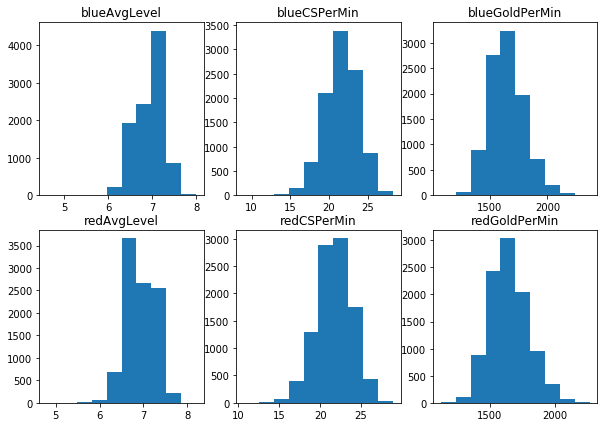

In [37]:
# Univariate analysis with histograms
fig = plt.subplots(figsize=(10,7))
for c, x in enumerate(LoL_df.select_dtypes(include= ['float']).columns, 1) :
    plt.subplot(2, 3, c)
    plt.hist(LoL_df[x])
    plt.title('{}'.format(x))
#plt.subplots_adjust(bottom=0.60, wspace=0.5)

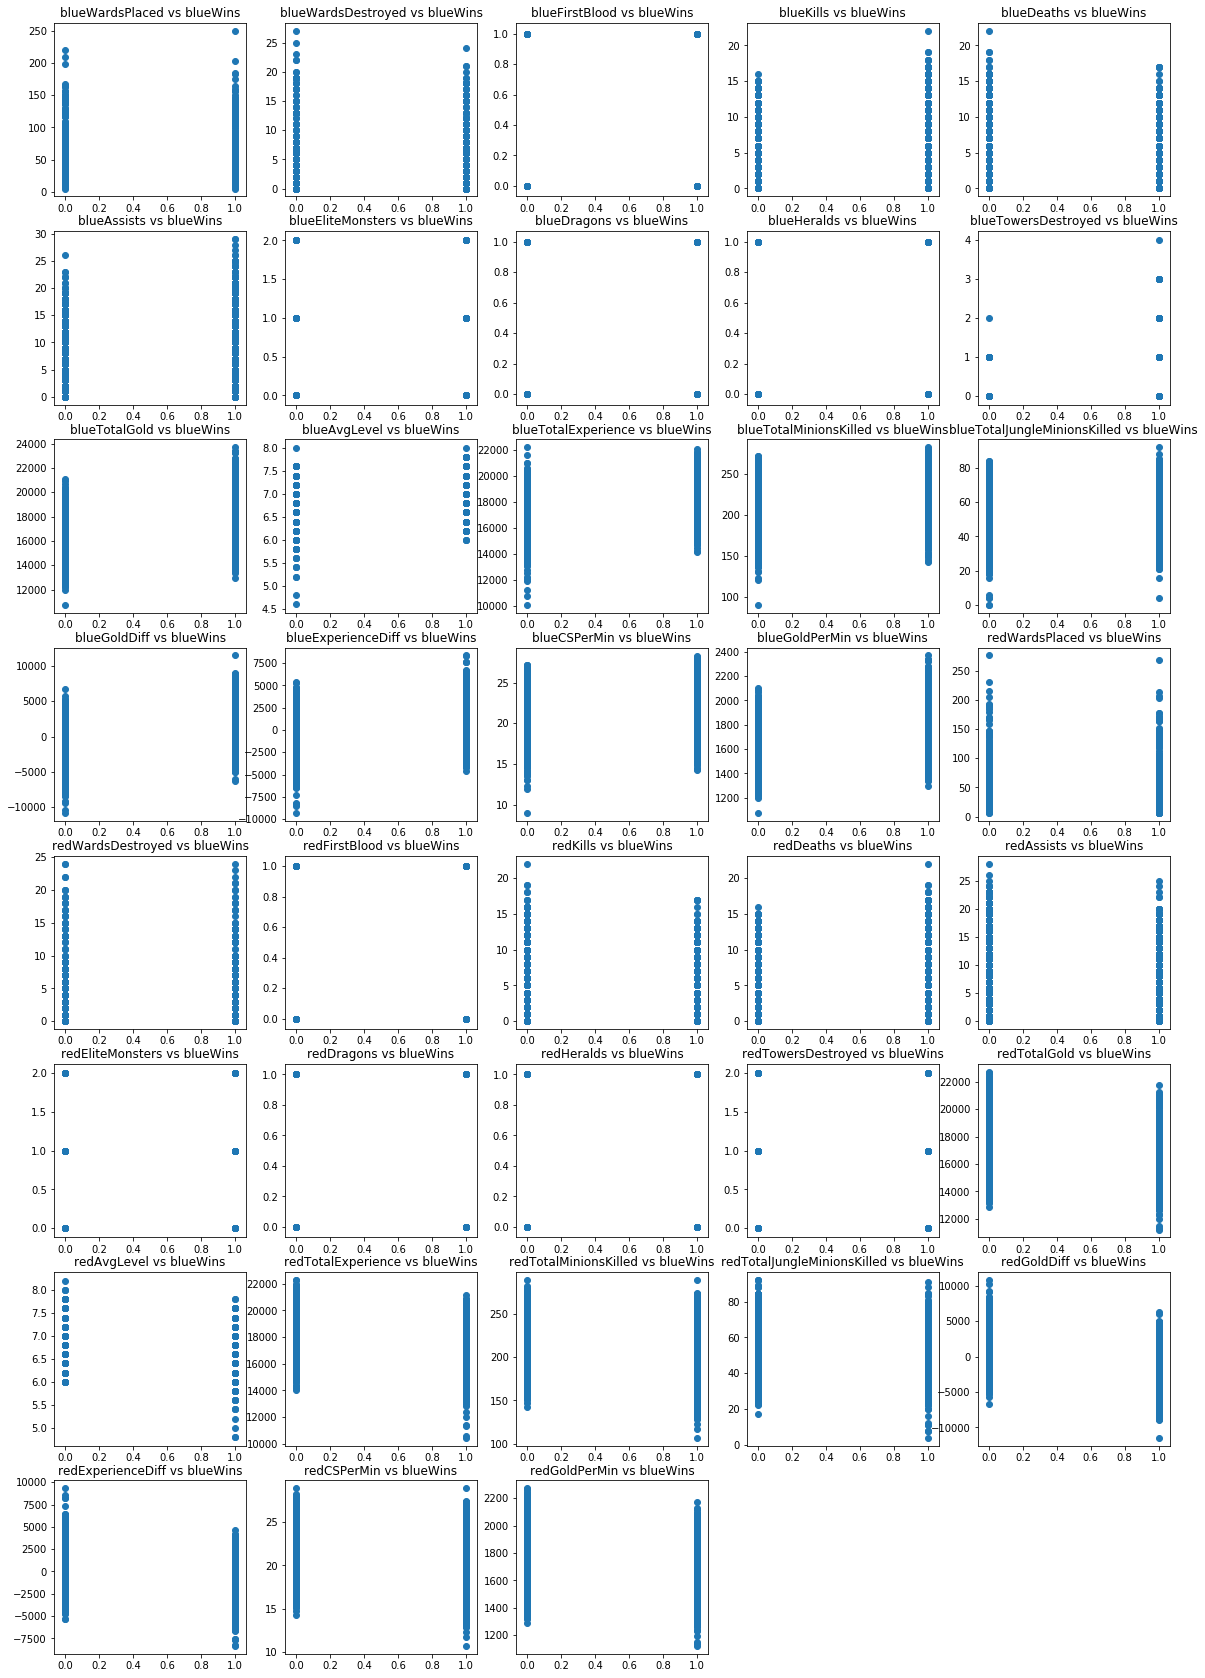

In [12]:
# multivariate analysis with scatter plots
fig = plt.subplots(figsize=(20,30))
for x in range(1, len(LoL_df.columns)):
    plt.subplot(8, 5, x)
    plt.scatter( LoL_df.iloc[:, 0], LoL_df.iloc[:, x])
    plt.title('{} vs blueWins'.format(LoL_df.columns[x]))

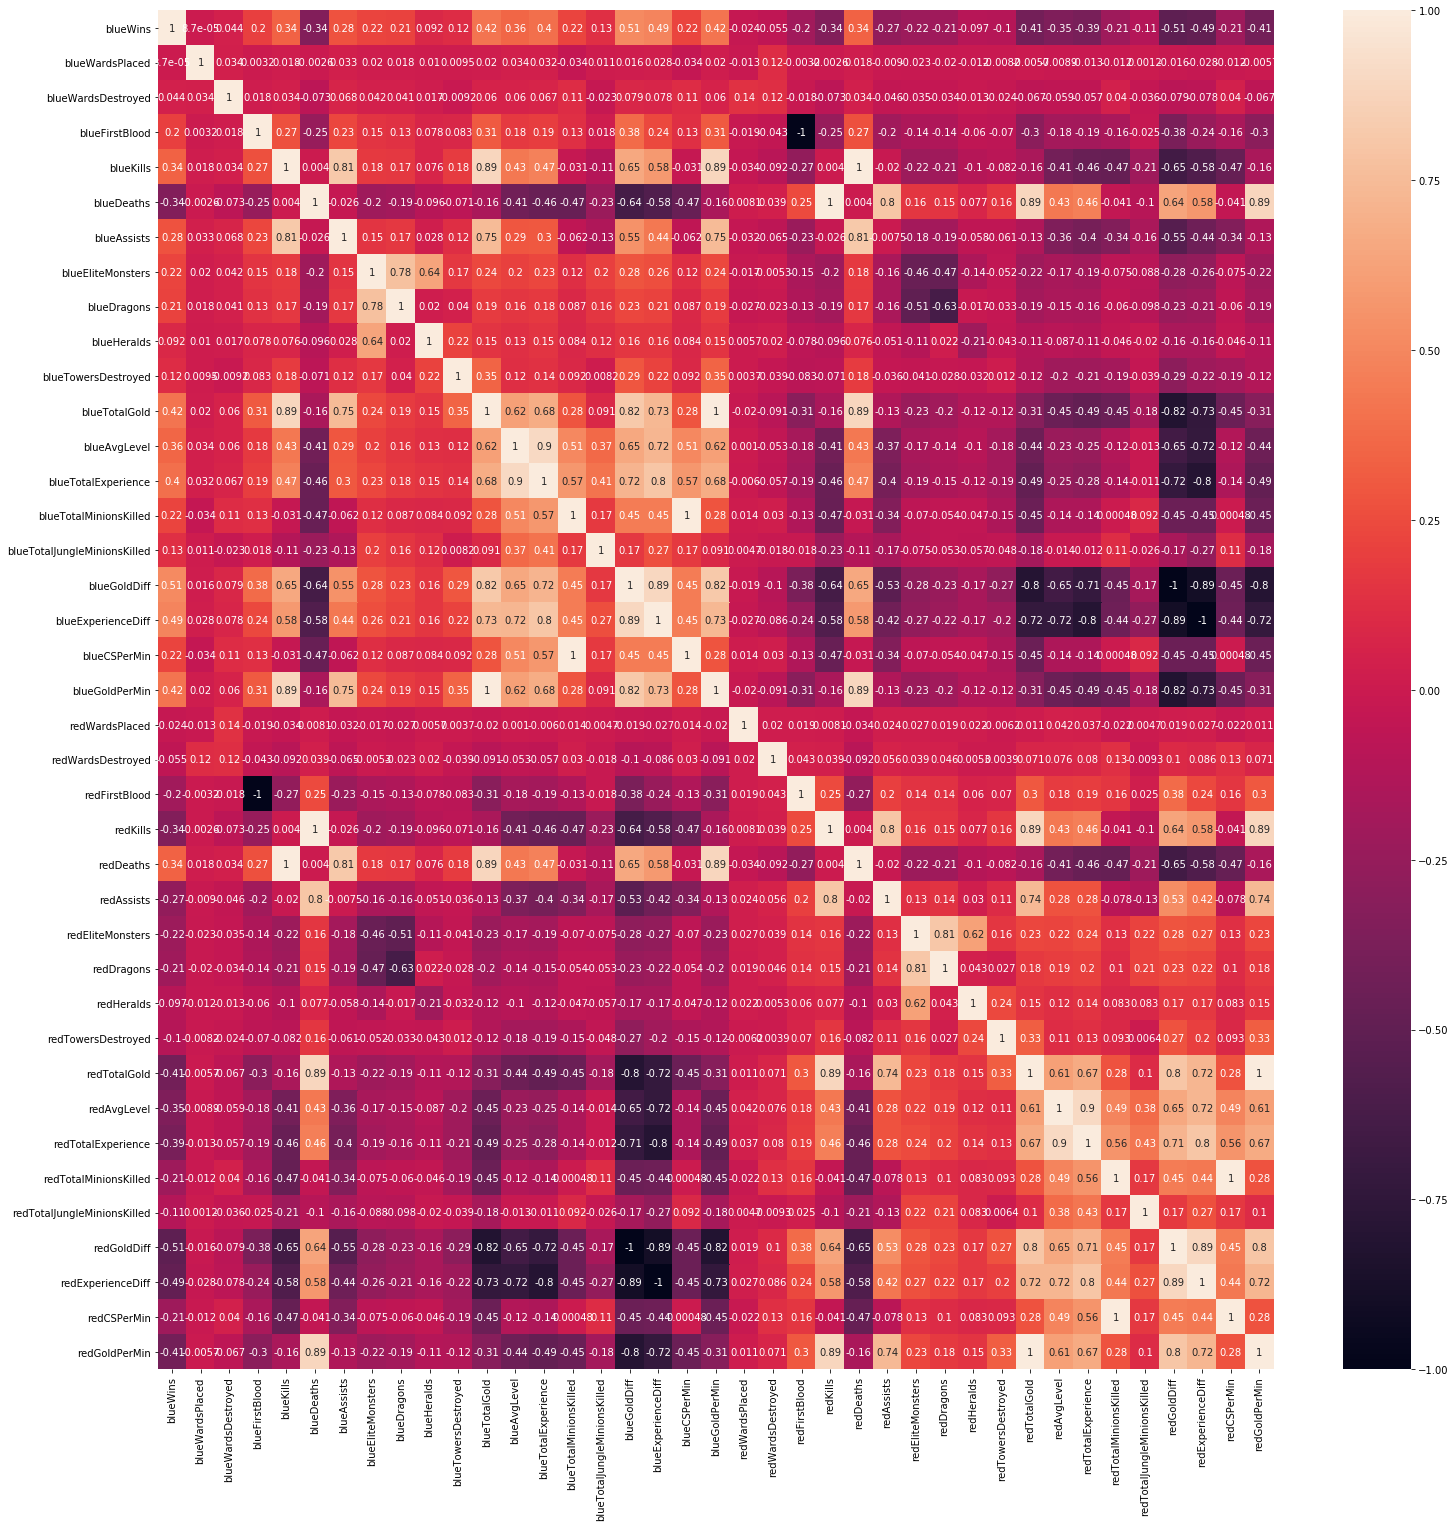

In [13]:
plt.figure(figsize=(25, 25))
corr = LoL_df.corr()
sns.heatmap(corr, annot=True)

In [14]:
# Select features that arent too closely correlated
features = list(corr.columns)
print('original feature length: {}'.format(len(features)))

# Loops to check correlation under diagonal (where columns correlate with themselves)
z = 1
for x in range(len(corr.columns)):
    col =  abs(corr.iloc[z:, x]).sort_values(ascending=False)
    for y in range(len(col)):
        if col[y] > .7:
            if col.index[y] in features:
                features.remove(col.index[y])
    z += 1    
print('new feature length: {}'.format(len(features)))

original feature length: 39
new feature length: 19


In [15]:
features_df = LoL_df[features]
features_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueEliteMonsters,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,redWardsPlaced,redWardsDestroyed,redEliteMonsters,redHeralds,redTowersDestroyed,redTotalMinionsKilled,redTotalJungleMinionsKilled
0,0,28,2,1,9,6,0,0,0,6.6,195,36,15,6,0,0,0,197,55
1,0,12,1,0,5,5,0,0,0,6.6,174,43,12,1,2,1,1,240,52
2,0,15,0,0,7,11,1,0,0,6.4,186,46,15,3,0,0,0,203,28
3,0,43,1,0,4,5,1,1,0,7.0,201,55,15,2,0,0,0,235,47
4,0,75,4,0,6,6,0,0,0,7.0,210,57,17,2,1,0,0,225,67


In [61]:
blue_feats = []
for col in features_df.columns:
    if col[:4] == 'blue':
        blue_feats.append(col)
print(blue_feats)

['blueWins', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueEliteMonsters', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalJungleMinionsKilled', 'blueWardsPlaced_boxcox', 'blueAvgLevel_boxcox', 'blueTotalMinionsKilled_boxcox']


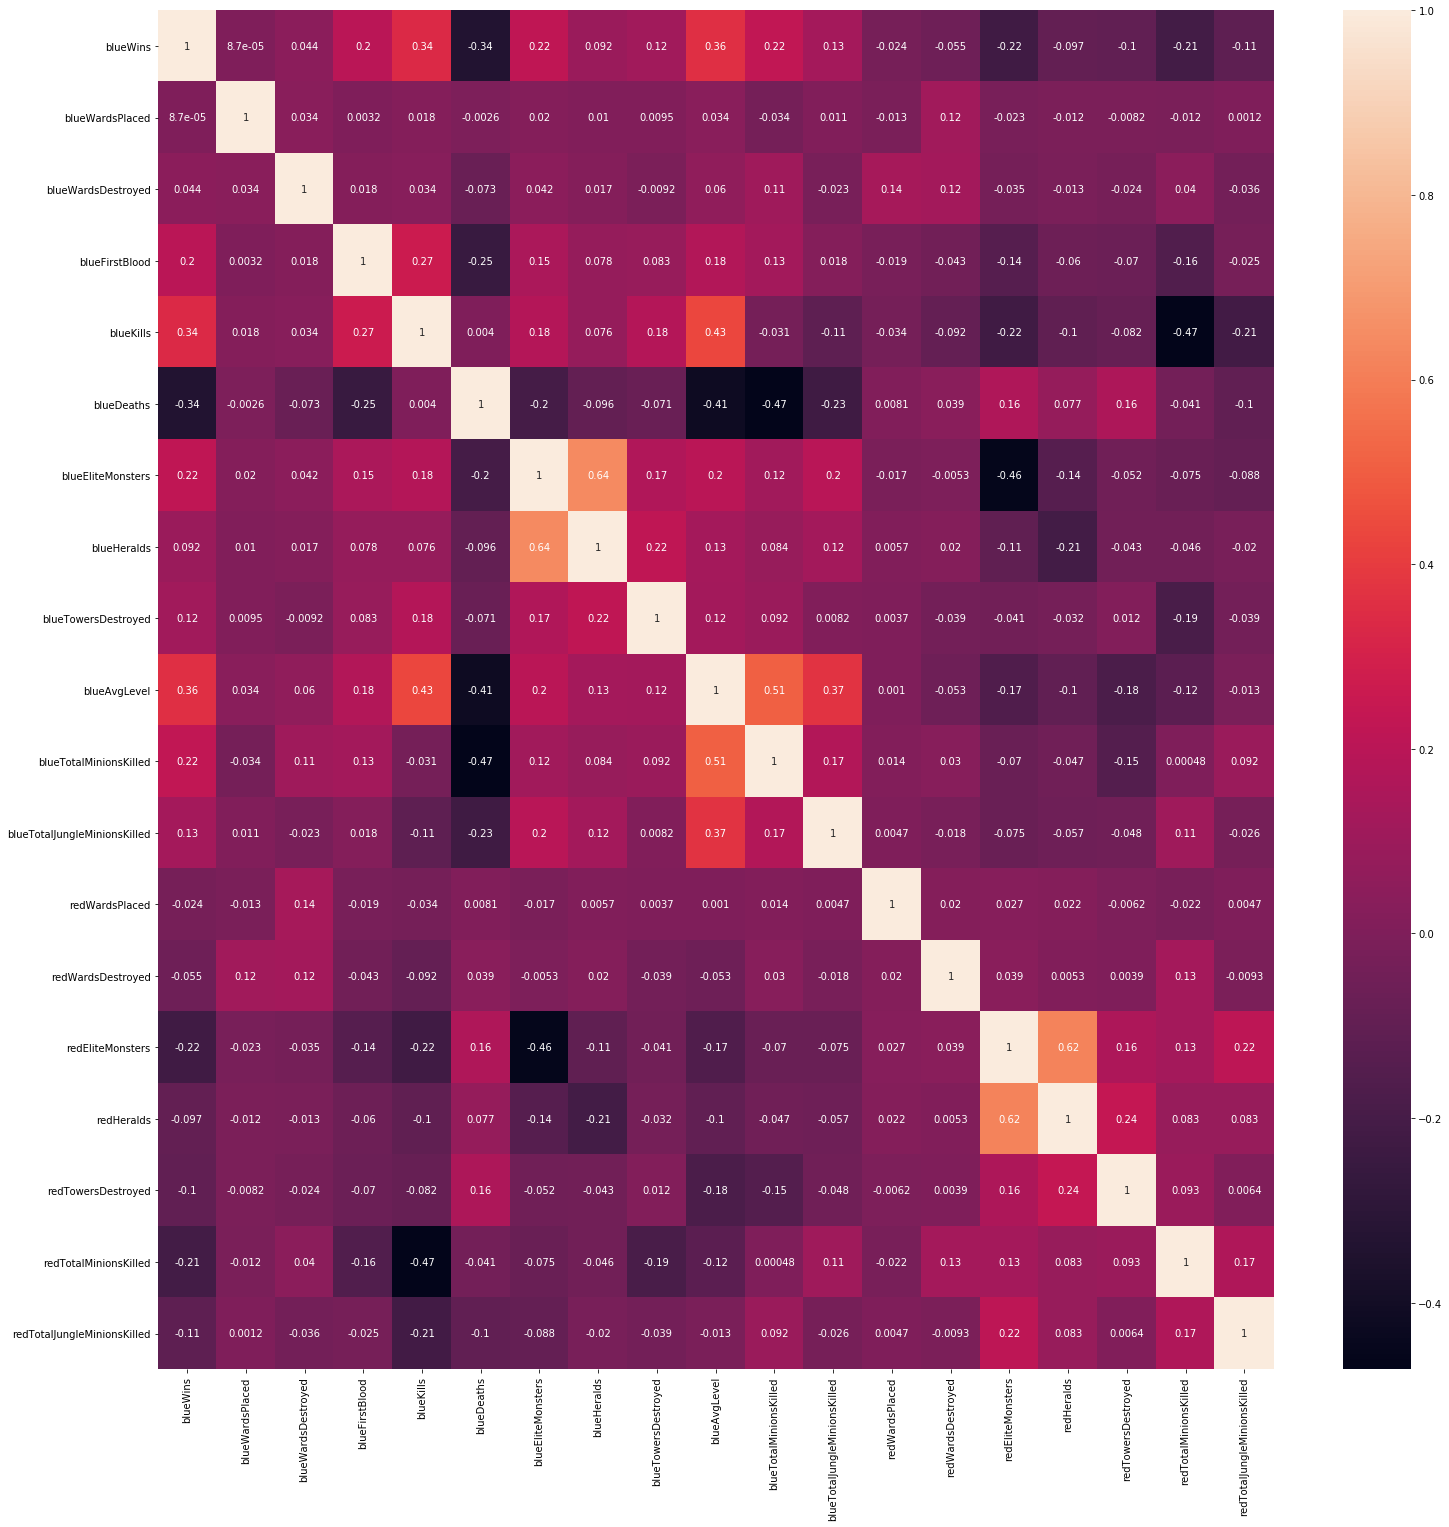

In [16]:
# Heatmap of features to model
plt.figure(figsize=(25, 25))
corr = features_df.corr()
sns.heatmap(corr, annot=True)

In [17]:
for x in features_df.columns:
    if len(features_df[x].unique()) > 3:
        if (features_df[x] > 0).all():
            print('----------{}----------'.format(x))
            norm_jb = jarque_bera(features_df[x])
            norm_normaltest = normaltest(features_df[x])
            print('Before boxcox, jarque_bera: {} with a p-value of: {}'.format(norm_jb[0], norm_jb[1]))
            print('Before boxcox, normality test: {} with a p-value of: {}'.format(norm_normaltest[0], norm_normaltest[1]))            
            
            
            box,_ = boxcox(features_df[x])
            box_jb = jarque_bera(box)
            box_normaltest = normaltest(box)
            print('After boxcox, jarque_bera: {} with a p-value of: {}'.format(box_jb[0], box_jb[1]))
            print('After boxcox, normality test: {} with a p-value of: {}'.format(box_normaltest[0], box_normaltest[1]))
            print('\n')
            features_df[x + '_boxcox'] = box
            features_df.drop(x, axis=1, inplace=True)

----------blueWardsPlaced----------
Before boxcox, jarque_bera: 254071.5757317314 with a p-value of: 0.0
Before boxcox, normality test: 8521.828593351831 with a p-value of: 0.0
After boxcox, jarque_bera: 1332.981010111096 with a p-value of: 0.0
After boxcox, normality test: 407.73966568925084 with a p-value of: 2.887065048202797e-89


----------blueAvgLevel----------
Before boxcox, jarque_bera: 700.3416754374367 with a p-value of: 0.0
Before boxcox, normality test: 402.38120428964896 with a p-value of: 4.2075731756617093e-88
After boxcox, jarque_bera: 74.57280759568137 with a p-value of: 1.1102230246251565e-16
After boxcox, normality test: 52.293342398161954 with a p-value of: 4.4120962508431386e-12


----------blueTotalMinionsKilled----------
Before boxcox, jarque_bera: 130.187445399561 with a p-value of: 0.0
Before boxcox, normality test: 124.80296235579094 with a p-value of: 7.931969979659822e-28
After boxcox, jarque_bera: 2.814463680925781 with a p-value of: 0.24482004697407822
Aft

In [18]:
# Split samples into independant and dependant variables
X = features_df.drop('blueWins', axis=1)

y = features_df['blueWins']

In [19]:
# Split variables into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [34]:
# Define logistic regression perameters and fit model with training set
lr = LogisticRegression(solver='lbfgs', penalty='none', random_state=40)
lr.fit(X_train, y_train)

# print train/test accuracy for the logistic regression model
print('train accuracy logistic regression: ', lr.score(X_train, y_train))
print('test accuracy logistic regression: ', lr.score(X_test, y_test))
print('\n')

# print the confusion matrix
predictions = lr.predict(X_test)

confusion_lr = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion_lr)

train accuracy logistic regression:  0.7193470833860559
test accuracy logistic regression:  0.7246963562753036


[[719 300]
 [244 713]]


In [21]:
# Use the dummy classifier to calculate the accuracy of a purely random chance.
dummy = DummyClassifier(strategy = 'most_frequent')
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

0.48431174089068824

Since the dummy score is less than 50%, the test accuracy of 70% is a decent prediction. The dummy score represents the average chance of guessing the right answer if all answers guessed were the most frequent choice. This means if all the choices were the same, there is less than a 50% average of guessing correctly, but over a 70% accuracy of guessing correctly if using the trained machine learning model to make predictions.

In [31]:
# K nearest neighbors model
knn = KNeighborsClassifier(n_neighbors=7, random_state = 40)
knn.fit(X_train, y_train)

# Scores and Prediction for KNN
knn_7_score_train = knn.score(X_train, y_train)
knn_7_score_test = knn.score(X_test, y_test)
knn_7_predictions = knn.predict(X_test)

# print train/test accuracy for the KNN model (k=7)
print('train accuracy KNN (k=7): ', knn_7_score_train)
print('test accuracy KNN (k=7): ', knn_7_score_test)
print('\n')

# print the confusion matrix
predictions = knn.predict(X_test)

confusion_knn = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion_knn)

train accuracy KNN (k=7):  0.7082120713653043
test accuracy KNN (k=7):  0.590080971659919


[[611 408]
 [402 555]]


In [32]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators = 100, random_state = 40)
rf.fit(X_train,y_train)

# Scores and Prediction for Random Forest model
rf_score_train = rf.score(X_train, y_train)
rf_score_test = rf.score(X_test, y_test)
rf_predictions = rf.predict(X_test)

# print train/test accuracy for the KNN model (k=7)
print('train accuracy KNN (k=7): ', rf_score_train)
print('test accuracy KNN (k=7): ', rf_score_test)
print('\n')

# print the confusion matrix
predictions = rf.predict(X_test)

confusion_rf = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion_rf)

train accuracy KNN (k=7):  1.0
test accuracy KNN (k=7):  0.7120445344129555


[[704 315]
 [254 703]]


In [59]:
# SVC model
C = [np.arange(1, 1200, 200)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [np.arange(1, 6, 1)]
gamma = ['scale', 'auto']
r = 40


svc = SVC(C=50, kernel='linear', random_state=r)
svc.fit(X_train,y_train)

# Scores and Prediction for SVC model
svc_score_train = rf.score(X_train, y_train)
svc_score_test = rf.score(X_test, y_test)
svc_predictions = rf.predict(X_test)

# print train/test accuracy for the KNN model (k=7)
print('train accuracy SVC: ', svc_score_train)
print('test accuracy SVC: ', svc_score_test)
print('\n')

# print the confusion matrix
predictions = svc.predict(X_test)

confusion_svc = confusion_matrix(y_test, predictions, labels=[1, 0])
print(confusion_svc)

train accuracy SVC:  1.0
test accuracy SVC:  0.7120445344129555


[[726 293]
 [222 735]]


In [25]:
# Define function to plot the confusion matrix
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

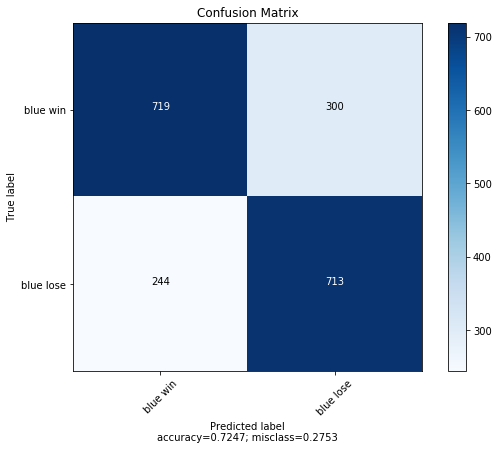

In [26]:
# Use function to plot the confusion matrix
plot_confusion_matrix(cm= confusion_lr,target_names=['blue win', 'blue lose'],title = 'Confusion Matrix',normalize=False)

In [27]:
# Classification Report
report = classification_report(y_test, predictions, target_names=['blue win', 'blue lose'])
print(report)

              precision    recall  f1-score   support

    blue win       0.70      0.75      0.72       957
   blue lose       0.75      0.71      0.73      1019

    accuracy                           0.72      1976
   macro avg       0.73      0.73      0.72      1976
weighted avg       0.73      0.72      0.72      1976



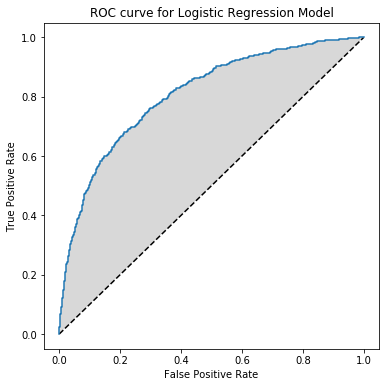

Area under the ROC curve: 0.808


In [28]:
# Caculate AUC and plot the curve.
probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.fill(fpr, tpr, 'grey', alpha=0.3)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Logistic Regression Model')
plt.show()

auc = roc_auc_score(y_test, probs)
print('Area under the ROC curve: {:.3f}'.format(auc))